In [1]:
import json
import xtrack as xt
import xpart as xp
import xobjects as xo
from matplotlib import pyplot as plt

context = xo.ContextCpu()

#with open('../data/collider_thin.json') as f:
#    dct = json.load(f)

#line = xt.Line.from_dict(dct['lines']['lhcb1'])
#line_edited =line.copy()

collider = xt.Multiline.from_json('../data/collider_thin.json')

line = collider['lhcb1']
for ii in line.elements:
   # if ii is a type 'multipole' 
    if type(ii) == xt.beam_elements.elements.Multipole:
        if len(ii.knl)>2:
            print(ii)
            ii.knl[2] = 0

line.vars['i_oct_b1'] = -250

line_edited = line.copy()
plt.close('all')

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Multipole(_order=3, inv_factorial_order=0.16666666666666666, length=0.066, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0.  0. -0.], ksl=[0. 0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=4, inv_factorial_order=0.041666666666666664, length=0.066, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0.  0.  0. -0.], ksl=[0. 0. 0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=2, inv_factorial_order=0.5, length=0.11, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0. -0.], ksl=[0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=2, inv_factorial_order=0.5, length=0.11, hxl=0.0, hyl=0.0, radiation_flag=0, knl=[ 0.  0. -0.], ksl=[0. 0. 0.], _internal_record_id=RecordIdentifier(buffer_id=0, offset=0))
Multipole(_order=3, inv_

In [2]:


my_particle = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x = 0.003)
line.particle_ref = my_particle


num_particles = 1
monitor_ip3 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=15,
                                    num_particles=num_particles)
monitor_ip5 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=15,
                                    num_particles=num_particles)
monitor_ip8 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=15,
                                    num_particles=num_particles)
line.insert_element(index='ip3', element=monitor_ip3, name='mymon3')
line.insert_element(index='ip5', element=monitor_ip5, name='mymon5')
line.insert_element(index='ip8', element=monitor_ip8, name='mymon8')




line.build_tracker()

num_turns = 100
monitor = xt.ParticlesMonitor(_context=context,
                              start_at_turn=0, stop_at_turn=15,
                              num_particles=num_particles)
line.track(my_particle, num_turns=num_turns)

aux = line.twiss()

Found suitable prebuilt kernel `default_only_xtrack`.


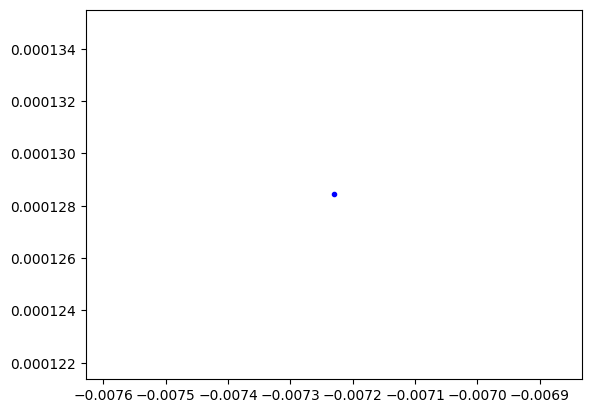

In [3]:
plt.plot(my_particle.x, my_particle.px, '.b') 

In [4]:
monitors = {}  # Create an empty dictionary to store the monitors
num_particles = 1
num_turns = 100

for jj, ii in enumerate((['ip3']+list(aux[:, 'bpm.*']['name']))):
    monitor_name = f"mymon_{ii.replace('.', '_')}"
    monitors[monitor_name] = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=1, num_particles=num_particles)
    line_edited.insert_element(index=ii,
                                element=monitors[monitor_name], 
                                name=monitor_name)


In [5]:

line_edited.particle_ref = my_particle
line_edited.build_tracker()
line_edited.twiss()[:, 'mymon_.*']


Found suitable prebuilt kernel `default_only_xtrack`.


TwissTable: 568 rows, 35 cols
name                           s x px y py zeta delta        ptau    betx ...
mymon_ip3                      0 0  0 0  0    0     0           0 121.567
mymon_bpmw_4r3_b1        22.5205 0  0 0  0    0     0           0 44.3247
mymon_bpmwe_4r3_b1       50.0655 0  0 0  0    0     0           0 30.7222
mymon_bpmw_5r3_b1        125.194 0  0 0  0    0     0           0 347.645
mymon_bpmwj_a5r3_b1      153.912 0  0 0  0    0     0           0 302.553
mymon_bpmwc_6r3_b1        193.73 0  0 0  0    0     0           0 64.7946
mymon_bpmr_6r3_b1        205.808 0  0 0  0    0     0           0 39.6087
mymon_bpm_a_7r3_b1       261.632 0  0 0  0    0     0           0 90.9054
mymon_bpm_8r3_b1         300.696 0  0 0  0    0     0           0 34.1434
mymon_bpm_9r3_b1         339.761 0  0 0  0    0     0           0 128.544
mymon_bpm_10r3_b1        380.224 0  0 0  0    0     0           0 54.4521
mymon_bpm_11r3_b1        433.005 0  0 0  0    0     0           0 185.453
mymo

In [6]:
line_edited.twiss()[:, 'mymon_.*'].mux

array([0.00000000e+00, 4.96282714e-02, 1.97265362e-01, 3.26797838e-01,
       3.39425646e-01, 3.85320597e-01, 4.25458599e-01, 6.15692773e-01,
       7.28733914e-01, 8.34901690e-01, 9.09665224e-01, 1.00243403e+00,
       1.10610440e+00, 1.22721348e+00, 1.34174235e+00, 1.47865141e+00,
       1.59260375e+00, 1.72918943e+00, 1.84372236e+00, 1.98062312e+00,
       2.09457207e+00, 2.23116608e+00, 2.34570233e+00, 2.48283320e+00,
       2.59736948e+00, 2.73449965e+00, 2.84903593e+00, 2.98616681e+00,
       3.10070307e+00, 3.23783324e+00, 3.35236953e+00, 3.48950041e+00,
       3.60403666e+00, 3.74116683e+00, 3.85570313e+00, 3.99283401e+00,
       4.10737025e+00, 4.24450042e+00, 4.35903674e+00, 4.49616761e+00,
       4.61070383e+00, 4.74783401e+00, 4.86237034e+00, 4.99950121e+00,
       5.11403742e+00, 5.25116760e+00, 5.36570394e+00, 5.50283481e+00,
       5.61697369e+00, 5.75333631e+00, 5.86768392e+00, 6.00481156e+00,
       6.11894221e+00, 6.25530791e+00, 6.36966375e+00, 6.50678816e+00,
      

In [7]:
particles = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x=-0.000)
line_edited.track(particles, num_turns=num_turns)

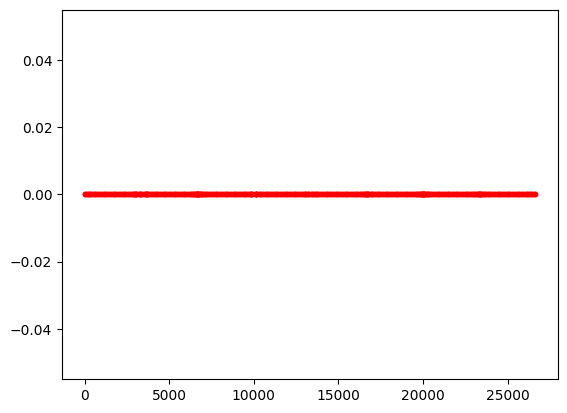

In [8]:

s_list = [monitors[ii].s[0,0] for ii in monitors]
x_list = [monitors[ii].x[0,0] for ii in monitors]
plt.plot(s_list, x_list, '.-r')

In [9]:

# Now for a more realistic example we want to track a gaussian bunch of particles
# Matched to the RF bucket
N_particles = 10001
bunch_intensity = 2.2e11
normal_emitt_x = 2.5e-6 #m*rad
normal_emitt_y = 2.5e-6 #m*rad
sigma_z = 7.6e-2
particle_ref = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9)
gaussian_bunch = xp.generate_matched_gaussian_bunch(
        num_particles = N_particles, total_intensity_particles = bunch_intensity,
        nemitt_x = normal_emitt_x, nemitt_y=normal_emitt_y, sigma_z = sigma_z,
        particle_ref = particle_ref,
        line = collider['lhcb1'])
dir(gaussian_bunch)


*** Maximum RMS bunch length 0.11789515101464539m.
... distance to target bunch length: -7.6000e-02
... distance to target bunch length: 3.8638e-02
... distance to target bunch length: 3.4189e-02
... distance to target bunch length: 8.2053e-03
... distance to target bunch length: -1.2051e-02
... distance to target bunch length: 9.0274e-04
... distance to target bunch length: -2.7068e-05
... distance to target bunch length: 2.4776e-07
... distance to target bunch length: -1.1678e-07
--> Bunch length: 0.07599988322232151
--> Emittance: 2.1789577686617863


['XoStruct',
 '_XoStruct',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allclose',
 '_assert_values_consistent',
 '_beta0',
 '_beta0_setitem',
 '_buffer',
 '_bypass_linked_vars',
 '_capacity',
 '_cname',
 '_contains_lost_or_unallocated_particles',
 '_context',
 '_delta',
 '_delta_setitem',
 '_extra_c_sources',
 '_fields',
 '_gamma0',
 '_gamma0_setitem',
 '_has_valid_rng_state',
 '_init_random_number_generator',
 '_inverse_rename',
 '_kernels',
 '_movable',
 '_move_to',
 '_num_active_particles',
 '_num_lost_particles',
 '_num_shown_particles',
 '_offset',
 '_overridable',
 '_p0c',
 '_p0c_setitem',
 '_ptau',
 '_ptau_setitem',
 '_py_

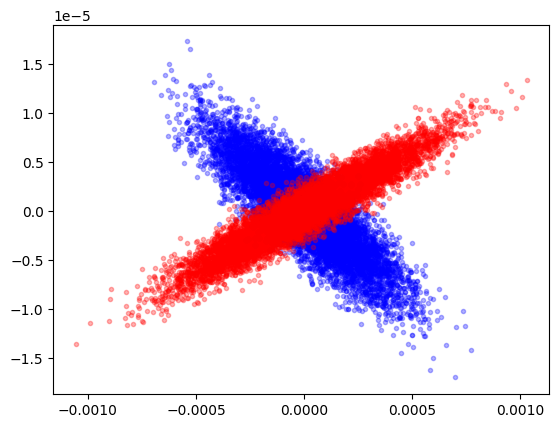

In [10]:

starting_x = gaussian_bunch.x
starting_y = gaussian_bunch.y
starting_px = gaussian_bunch.px
starting_py = gaussian_bunch.py
plt.plot(starting_x, starting_px, '.b', alpha=0.3)
plt.plot(starting_y, starting_py, '.r', alpha=0.3)


Text(0.5, 1.0, 'Transverse phase space')

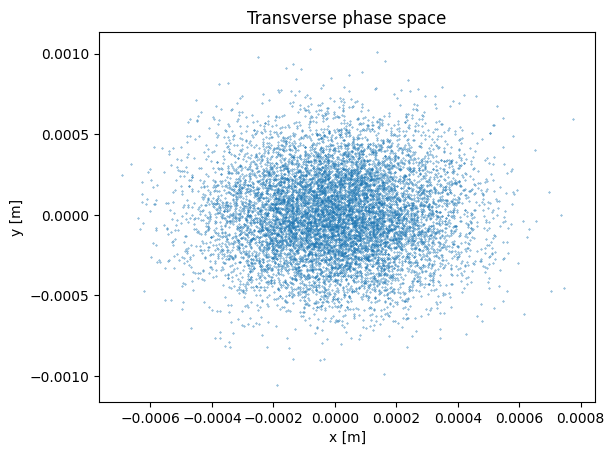

In [11]:
plt.scatter(starting_x, starting_y, s = 0.1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Transverse phase space')

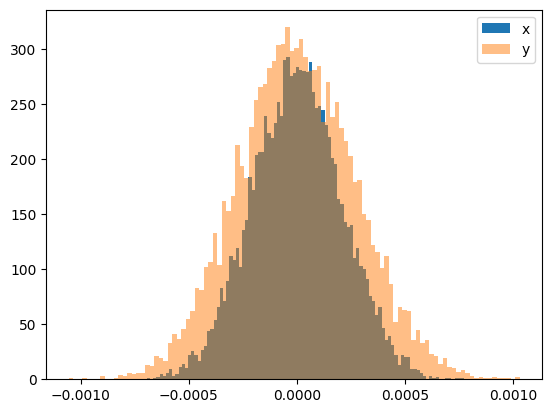

In [12]:
# Distribution of the gaussian bunch in x and y

plt.hist(starting_x, bins=100, label = 'x')
plt.hist(starting_y, bins=100, alpha=0.5, label='y')
plt.legend()

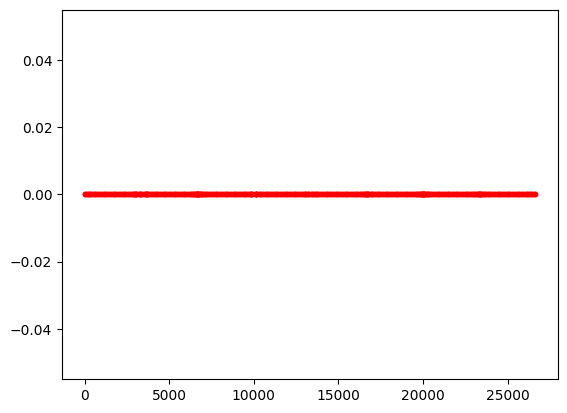

In [13]:
s_list = [monitors[ii].s[0,0] for ii in monitors]
x_list = [monitors[ii].x[0,0] for ii in monitors]
plt.plot(s_list, x_list, '.-r')

In [14]:
collider['lhcb1'].track(gaussian_bunch, num_turns = 100)

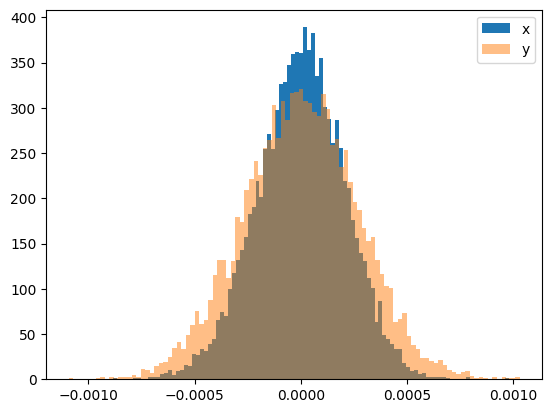

In [15]:
ending_x = context.nparray_from_context_array(gaussian_bunch.x).copy()
ending_y = context.nparray_from_context_array(gaussian_bunch.y).copy()
ending_px = context.nparray_from_context_array(gaussian_bunch.px).copy()
ending_py = context.nparray_from_context_array(gaussian_bunch.py).copy()
plt.hist(ending_x, bins=100, label = 'x')
plt.hist(ending_y, bins=100, alpha=0.5, label='y')
plt.legend()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   3.,   1.,
          3.,   2.,   2.,   5.,   3.,  11.,  10.,   7.,  15.,  18.,  19.,
         25.,  35.,  41.,  34.,  49.,  60.,  76.,  61.,  65.,  88., 115.,
        132., 132., 112., 131., 179., 174., 209., 221., 241., 226., 256.,
        264., 303., 267., 307., 286., 316., 317., 321., 307., 305., 295.,
        291., 315., 299., 259., 265., 235., 253., 218., 196., 187., 167.,
        153., 157., 132., 116., 103., 101.,  63.,  67.,  73.,  48.,  38.,
         34.,  23.,  23.,  20.,  18.,  21.,  16.,  10.,   8.,   6.,   8.,
          9.,   4.,   1.,   2.,   1.,   0.,   2.,   0.,   2.,   1.,   1.,
          2.]),
 array([-1.09277920e-03, -1.07156184e-03, -1.05034449e-03, -1.02912713e-03,
        -1.00790978e-03, -9.86692426e-04, -9.65475072e-04, -9.44257717e-04,
        -9.23040363e-04, -9.01823009e-04, -8.80605655e-04, -8.59388301e-04,
        -8.38170947e-04, -8.16953593e-04, -7.95736239e-04, -7.74518885e-04,
        -7.533

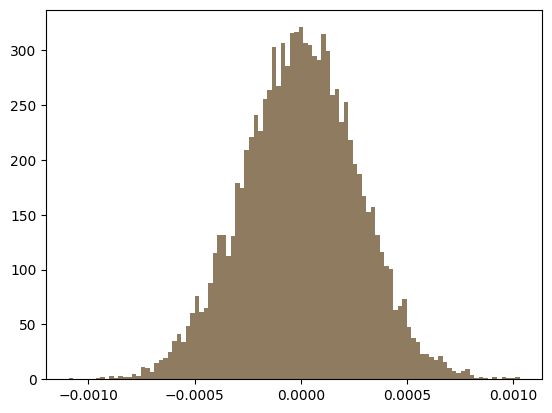

In [16]:
plt.hist(starting_y, bins=100)
plt.hist(ending_y, bins=100, alpha=0.5)

Text(0.5, 1.0, 'Transverse phase space')

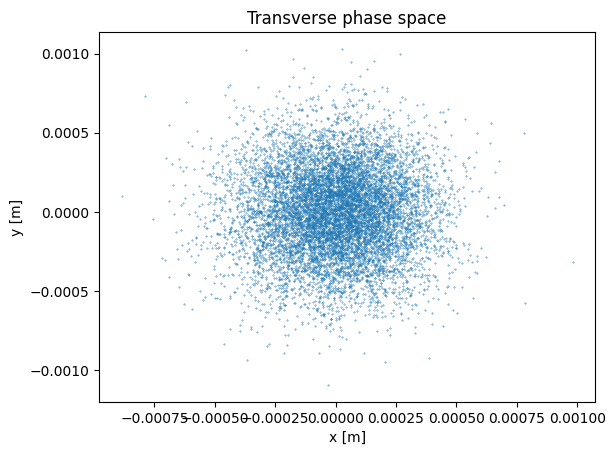

In [17]:
plt.scatter(ending_x, ending_y, s = 0.1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Transverse phase space')

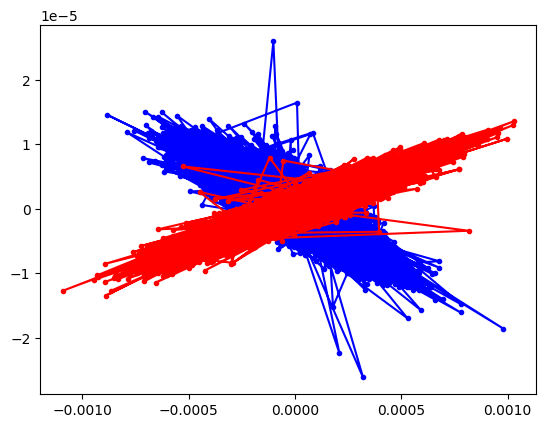

In [18]:
plt.plot(ending_x, ending_px, '.-b')
plt.plot(gaussian_bunch.y, gaussian_bunch.py, '.-r')